# 資料準備

In [1]:
import tensorflow as tf
import numpy as np

import tensorflow.examples.tutorials.mnist.input_data as input_data
import sys
sys.path.append('../')
from util.my_plot import layer,plot_images_labels_prediction, plot_batch

Using TensorFlow backend.


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print('train images     :', mnist.train.images.shape,
      'labels:'           , mnist.train.labels.shape)
print('validation images:', mnist.validation.images.shape,
      ' labels:'          , mnist.validation.labels.shape)
print('test images      :', mnist.test.images.shape,
      'labels:'           , mnist.test.labels.shape)

('train images     :', (55000, 784), 'labels:', (55000, 10))
('validation images:', (5000, 784), ' labels:', (5000, 10))
('test images      :', (10000, 784), 'labels:', (10000, 10))


# 建立模型

## 建立共用函數

In [4]:
def kernel(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

In [5]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

In [6]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

## Input Layer

In [7]:
x = tf.placeholder("float", [None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])

## Convolutional layer 1

```python
model.add(Conv2D(filters=16, kernel_size=(5,5),  
                 padding='same',input_shape=(28,28,1), activation=tf.nn.relu)) 
```

In [8]:
# convolution
W1 = kernel([ 5,5,1,16])
Conv1=conv2d(x_image, W1)
C1_Conv = tf.nn.relu(Conv1)

# max pool
C1_Pool = max_pool_2x2(C1_Conv)

## Convolutional layer 2

```python
model.add(Conv2D(filters=36, kernel_size=(5,5),
                 padding='same', activation=tf.nn.relu)) 
```

In [9]:
# convolution
W2 = kernel([5,5,16,36])
Conv2=conv2d(C1_Pool, W2)
C2_Conv = tf.nn.relu(Conv2)

# max pool
C2_Pool = max_pool_2x2(C2_Conv) 

## Flatten Layer

In [10]:
D_Flat = tf.reshape(C2_Pool, [-1, 1764])

## Fully Connected Layer

在 MLP中，input為 28* 28 的影像
```python
x = tf.placeholder("float", [None, 784])
```

在CNN中，FC Layer的 input為 36 * 7*7

In [11]:
D_Hidden=layer(output_dim=256,input_dim=1764, inputs=D_Flat ,activation=tf.nn.relu)  
D_Hidden_Dropout= tf.nn.dropout(D_Hidden, keep_prob=0.5)

## 建立輸出層

In [12]:
y_predict=layer(output_dim=10,input_dim=256, inputs=D_Hidden_Dropout,activation=tf.nn.softmax)

# 定義訓練方式

In [13]:
#建立訓練資料label真實值 placeholder

In [14]:
y_label = tf.placeholder("float", [None, 10])

In [15]:
#定義loss function

In [16]:
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [17]:
#選擇optimizer

In [18]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

# 定義評估模型的準確率

In [19]:
#計算每一筆資料是否正確預測

In [20]:
correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

In [21]:
#將計算預測正確結果，加總平均

In [22]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 開始訓練

In [23]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
epoch_list=[]
val_loss_list=[];val_accuracy_list=[]
loss_list=[];accuracy_list=[]
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [24]:
print(totalBatchs)

550


In [25]:
# 進行多次實驗
for epoch in range(trainEpochs):
    # 每一步取一批做運算
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x/255 ,y_label: batch_y})
    
    # 計算training data的準確度 
    loss,acc = sess.run([loss_function,accuracy], 
                        feed_dict={x: mnist.train.images[:5000]/255, 
                                   y_label: mnist.train.labels[:5000]})

    
    # 計算validate data的準確度 
    val_loss,val_acc = sess.run([loss_function,accuracy], 
                                feed_dict={x: mnist.validation.images/255, 
                                           y_label: mnist.validation.labels})

    
    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    val_loss_list.append(val_loss);val_accuracy_list.append(val_acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", "{:.9f}".format(loss), " Accuracy=",acc ,"val Loss=", "{:.9f}".format(val_loss)," val_Accuracy=",val_acc  )
    
duration =time()-startTime
print("Train Finished takes:",duration)      

('Train Epoch:', '01', 'Loss=', '1.701995730', ' Accuracy=', 0.7592, 'val Loss=', '1.690300822', ' val_Accuracy=', 0.769)
('Train Epoch:', '02', 'Loss=', '1.555642128', ' Accuracy=', 0.9074, 'val Loss=', '1.544175148', ' val_Accuracy=', 0.9158)
('Train Epoch:', '03', 'Loss=', '1.531026125', ' Accuracy=', 0.9306, 'val Loss=', '1.523388624', ' val_Accuracy=', 0.9378)
('Train Epoch:', '04', 'Loss=', '1.517995358', ' Accuracy=', 0.9424, 'val Loss=', '1.513826132', ' val_Accuracy=', 0.9498)
('Train Epoch:', '05', 'Loss=', '1.512517095', ' Accuracy=', 0.9492, 'val Loss=', '1.508833885', ' val_Accuracy=', 0.953)
('Train Epoch:', '06', 'Loss=', '1.509314537', ' Accuracy=', 0.952, 'val Loss=', '1.502756000', ' val_Accuracy=', 0.9594)
('Train Epoch:', '07', 'Loss=', '1.504531622', ' Accuracy=', 0.9576, 'val Loss=', '1.497204185', ' val_Accuracy=', 0.964)
('Train Epoch:', '08', 'Loss=', '1.496636391', ' Accuracy=', 0.9656, 'val Loss=', '1.496288657', ' val_Accuracy=', 0.9656)
('Train Epoch:', '09

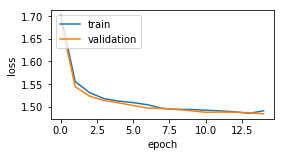

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.plot(epoch_list, val_loss_list, label = 'val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


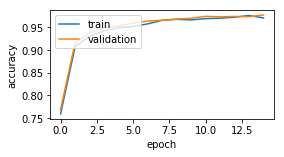

In [27]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
plt.plot(epoch_list, val_accuracy_list,label="accuracy" )

fig = plt.gcf()
fig.set_size_inches(4,2)
# plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 評估模型準確率

In [28]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: mnist.test.images,
                                      y_label: mnist.test.labels}))

('Accuracy:', 0.9429)


# 進行預測

In [29]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: mnist.test.images })

In [30]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 8, 9])

In [31]:
mnist.test.images.shape
aa = mnist.test.images.reshape(10000,28,28)
prediction_result.shape
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

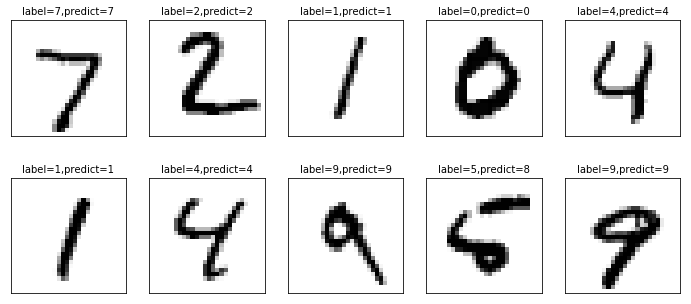

In [32]:
plot_images_labels_prediction(aa,
                              np.argmax(mnist.test.labels,axis=1),
                              prediction_result,0)

In [33]:
y_predict_Onehot=sess.run(y_predict,
                          feed_dict={x: mnist.test.images })

In [34]:
y_predict_Onehot[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 針對位移過的圖進行預測

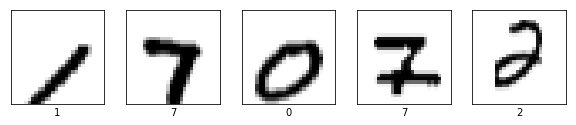

In [39]:
from util.my_plot import generate_shift_mnist_data
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

shift_img, shift_img_label = generate_shift_mnist_data(10000)
plot_batch(shift_img, shift_img_label,class_names, 5)

In [40]:
from keras.utils import np_utils
bb = shift_img.reshape(10000, 784)
shift_img_label_OneHot = np_utils.to_categorical(shift_img_label)

In [41]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: bb/255,
                                      y_label: shift_img_label_OneHot}))

RuntimeError: Attempted to use a closed Session.

In [38]:
sess.close()